# Numbers with TensorFlow 2.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves.urllib.request import urlretrieve

## Getting Data
First step is to actually get some data! We are downloding the famous [MNIST](http://yann.lecun.com/exdb/mnist/) data set created by Yann LeCun et al. It basically has representations of digits (in numpy arrays) as well as the corresponding number. Our job is to create a function that can tell them all apart.

In [2]:
mnist_file = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
file, output = urlretrieve(mnist_file, 'mnist.npz')

In [3]:
with np.load(file) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

This helpful function takes the numpy arrays and draws them as a sanity check.

In [4]:
def draw_digits(X, y):
    fig, axes = plt.subplots(6, 20, figsize=(18, 7),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(255 - X[i], cmap='gray')
        ax.set_title('{:.0f}'.format(y[i]))

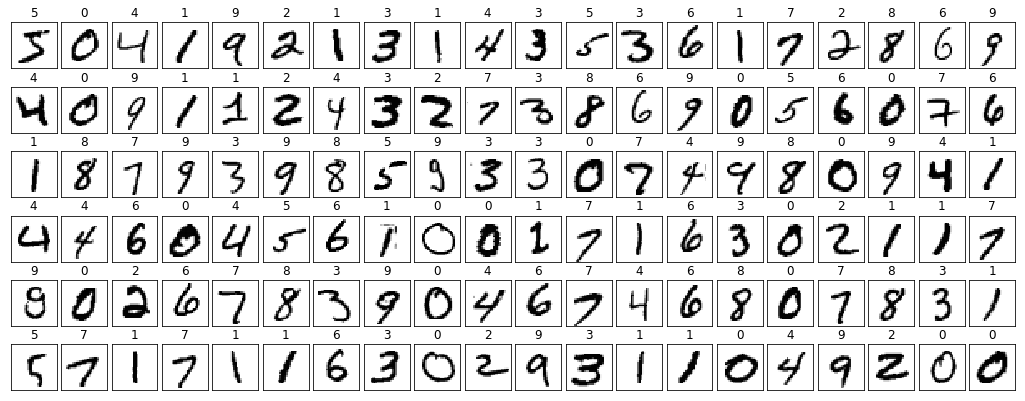

In [5]:
draw_digits(x_train, y_train)

## Making a Model (or function)
Since we are restricting our model to only use `if` statements then lets try a decision tree model!

In [6]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'1.14.0'

We have to reshape the images because they are currently `28 x 28` pixel grayscale arrays. We want to flatten them so a row now becomes `784` pixels of numbers between `0 .. 255`. We also scale the numbers by dividing by `255`. We are scaling them to be between 0 and 1 this is one way of [Normalizing](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/normalize-data) data. You will be able to visulaize this below by printing out the first item in the training set before and after it is reshaped.

In [7]:
#Current shape of training data set. 60000 examples that are 28 x 28
x_train.shape

(60000, 28, 28)

In [8]:
#Reshape docs: https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
#One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.
train_set = x_train.reshape((len(x_train), -1))

In [9]:
train_set.shape

(60000, 784)

In [10]:
y_train[0]

5

In [11]:
train_set[0].shape

(784,)

In [12]:
train_set[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [13]:
#We can do the reshape and normalization all in one line like this. (we split it above so you can see whats happening)
train_set = x_train.reshape((len(x_train), -1)) / 255

In [14]:
train_set[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# function shape
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

W0826 21:36:23.911801 140308596516672 deprecation.py:506] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Once we have the function and the optimization method then we just fit the model!

In [16]:
# how to optimize the function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_set, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2590 - acc: 0.9262
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1139 - acc: 0.9660
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0792 - acc: 0.9759
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0594 - acc: 0.9815
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0461 - acc: 0.9857
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0364 - acc: 0.9884
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0302 - acc: 0.9905
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0233 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0195 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 5s 80us/sample - loss: 

## Testing the Model
Now that we've made a model - let's see if it works!

In [20]:
test_set = x_test.reshape((len(x_test), -1)) / 255.
test_loss, test_acc = model.evaluate(test_set, y_test)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.1024 - acc: 0.9778

Test accuracy: 0.9778
